# Data analysis

Throughout all the following labs, we will work on the following problem: 

**Is it possible to predict each music's genre given their attributes ?**

We will begin by analyzing it using `pandas` and plot the data using `matplotlib` and `seaborn`.

In [129]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Load dataset
The dataset is available in its `csv` format.

In [154]:
df = pd.read_csv("C:/Users/trist/Documents/Cours/L3_MIASHS/Compléments_maths/S2/Projet/spotifyMusicGenres.csv")
df.head()

,artist,song,ids,genre,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,mode,valence
0,Kate Bush,Running Up That Hill (A Deal With God),75FEaRjZTKLhTrFGsfMUXR,Rock,0.72000,0.629,298933,0.547,0.003140,10,0.0604,-13.123,0.0550,108.375,0,0.197
1,The Killers,Mr. Brightside,003vvx7Niy0yvhvHt4a68B,Rock,0.00121,0.352,222973,0.911,0.000000,1,0.0995,-5.230,0.0747,148.033,1,0.236
2,Arctic Monkeys,505,0BxE4FqsDD1Ot4YuBXwAPp,Rock,0.00287,0.526,253587,0.866,0.000078,0,0.0945,-5.822,0.0568,140.266,1,0.248
3,Sam Fender,Seventeen Going Under,5rF6YUIlgiat22OT1lWspJ,Rock,0.00438,0.480,297933,0.870,0.006030,1,0.0826,-4.792,0.0362,161.953,1,0.584
4,George Ezra,Green Green Grass,3rk4aJ0vAj3cFUIQEeASkT,Rock,0.06950,0.685,167614,0.738,0.000000,8,0.1280,-4.413,0.0595,112.972,1,0.800


## Identify rows and columns
1. Find the number of rows and the number of columns

In [155]:
df.shape

(250, 16)

On a en tout 16 variables et 250 morceaux dans le jeu de données.

2. List every column name and give a brief description of the data, helping yourself with the [kaggle description](https://www.kaggle.com/datasets/rounakbanik/pokemon) of the dataset.

In [131]:
df.columns

Index(['artist', 'song', 'ids', 'genre', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'speechiness', 'tempo', 'mode', 'valence'],
      dtype='object')

Ce jeu de données contient 250 chansons différentes issues de Spotify. Le but va être de prédire le genre d'une musique selon ses caractéristiques.
La target est donc la variable qualitative genre, qui contient 5 modalités différentes : rock, rap, country, classical et EDM.
On retrouve dans ce jeu de données les variables (features) suivantes :
- artist (nom de l'artiste)
- song (nom de la chanson)
- ids (l'identfiant de la chanson sur Spotify)
- acousticness (taux qui mesure si la chanson est acoustique ou non)
- danceability (taux qui mesure si la chanson incite à danser ou non)
- duration_ms (durée de la chanson en millisecondes)
- energy (taux qui mesure l'énergie de la chanson)
- instrumentalness (taux qui mesure si la chanson est plutôt instrumentale ou vocale)
- key (la clé de la chanson ,-1 si non détectée)
- liveness (taux qui mesure la présence ou non d'enregistrement live)
- loudness (mesure du volume d'une chanson en dB, plus il est bas, plus la chanson a été atténuée donc plus elle est forte)
- speechiness (taux qui mesure la présence de paroles parlées dans la chanson)
- tempo (tempo de la chanson mesuré en bpm (beats per minute))
- mode (0 si la chanson est en mineur, 1 si majeur)
- valence (taux mesurant la positivité de la chanson)

A noter que ces variables et leurs valeurs sont également issues des données de Spotify.

3. Specify for each column the data type and create a list `quantitative_vars` that will contain the names of the quantitative variables and `qualitative_vars` that will contain the names of the qualitative variables.

In [156]:
qualitative_vars = ["song", "artist", "key", "mode"]
quantitative_vars = ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence"]
# On omet la variable id qui n'est pas utile pour l'analyse

4. What column are we trying to predict ? Store it into a list `target`.

In [157]:
target = df["genre"]

5. Infer what columns will be used for prediction and what column you can omit immediately. Create the corresponding list `features` and update `quantitative_vars` and `qualitative_vars`.

In [160]:
qualitative_vars = [var for var in qualitative_vars if var not in ["song", "artist"]]
#On sait d'ores-et-déjà que nous n'allons utiliser ni le nom de la chanson ni le nom de l'artiste pour classifier.

features = df[qualitative_vars+quantitative_vars]

In [161]:
features.head()

,key,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,10,0,0.72000,0.629,298933,0.547,0.003140,0.0604,-13.123,0.0550,108.375,0.197
1,1,1,0.00121,0.352,222973,0.911,0.000000,0.0995,-5.230,0.0747,148.033,0.236
2,0,1,0.00287,0.526,253587,0.866,0.000078,0.0945,-5.822,0.0568,140.266,0.248
3,1,1,0.00438,0.480,297933,0.870,0.006030,0.0826,-4.792,0.0362,161.953,0.584
4,8,1,0.06950,0.685,167614,0.738,0.000000,0.1280,-4.413,0.0595,112.972,0.800


6. Give the repartition of the target to predict using the `value_counts` method. How many songs per genre ?


In [136]:
target.value_counts()

genre
Rock         50
Rap          50
Country      50
Classical    50
EDM          50
Name: count, dtype: int64

Nous avons une répartition parfaitement uniforme entre chaque modalité du genre de musique.

## Univariate analysis

1. For each **quantitative variables** (that you should have stored in the variable `quantitative_vars`), give the main statistical estimators: mean, median, standard error.



In [162]:
df[quantitative_vars].describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.339804,0.578148,230590.324000,0.572698,0.187261,0.146420,-10.700616,0.071584,117.420964,0.476311
std,0.365613,0.172520,67721.657776,0.282715,0.359006,0.106238,9.228730,0.069168,25.622608,0.251459
min,0.000025,0.092100,120027.000000,0.001200,0.000000,0.037400,-40.558000,0.025300,48.718000,0.036000
25%,0.031950,0.501250,179709.750000,0.434000,0.000000,0.088800,-11.970000,0.036375,101.375750,0.301250
50%,0.177000,0.598000,214460.000000,0.660500,0.000107,0.111000,-6.709500,0.047250,120.045000,0.469000
75%,0.643500,0.687000,267544.750000,0.783000,0.017575,0.158000,-4.734750,0.067100,128.038000,0.670500
max,0.996000,0.949000,547107.000000,0.960000,0.978000,0.776000,-2.650000,0.484000,203.934000,0.965000


Ce tableau ressence toutes les statistiques descriptives associées aux différentes variables quantitatives du jeu de données.

2. For each **quantitative variables** (that you should have stored in the variable `quantitative_vars`), plot the variable repartitions using `sns.histplot` and `sns.violinplot`. Deduce for each variable a possible distribution.

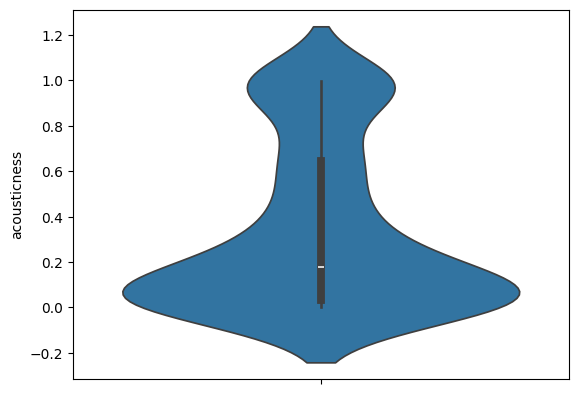

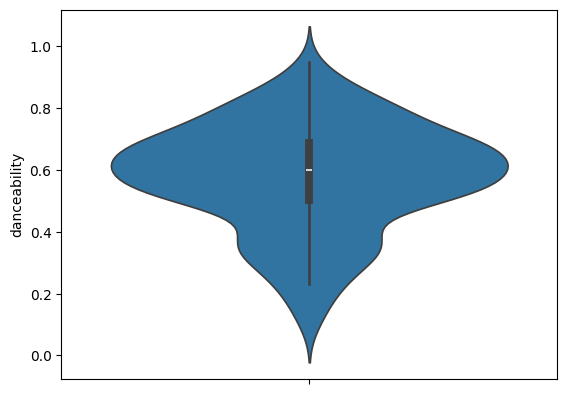

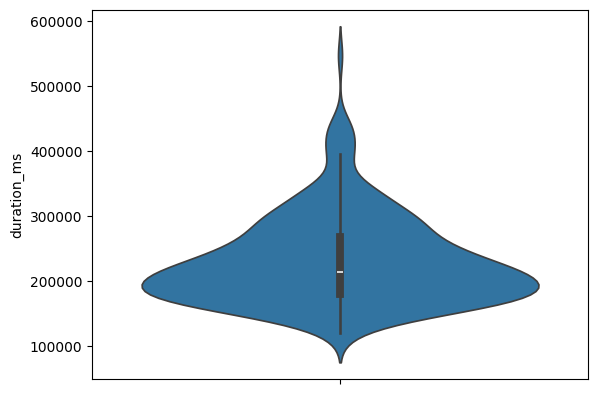

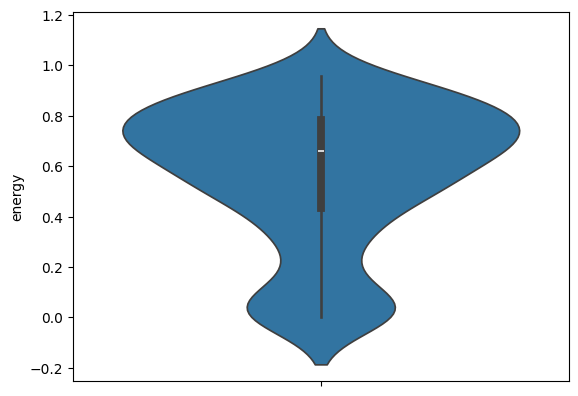

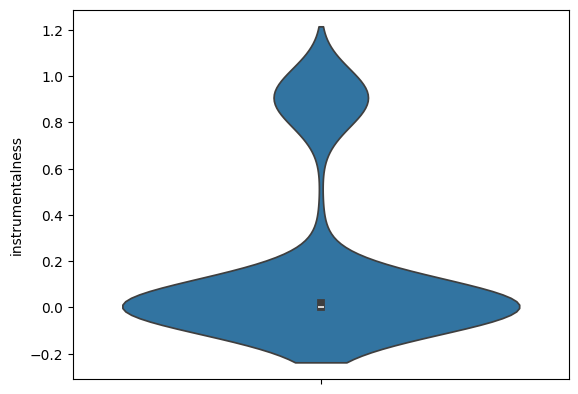

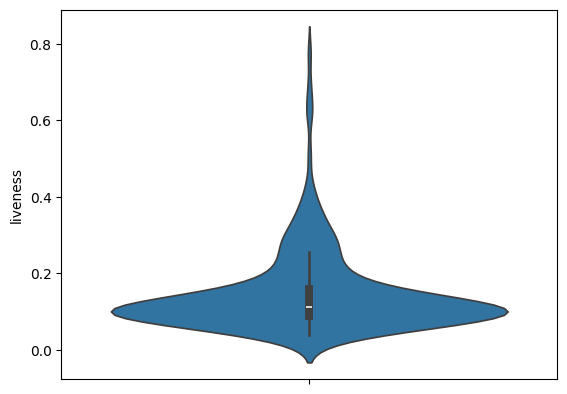

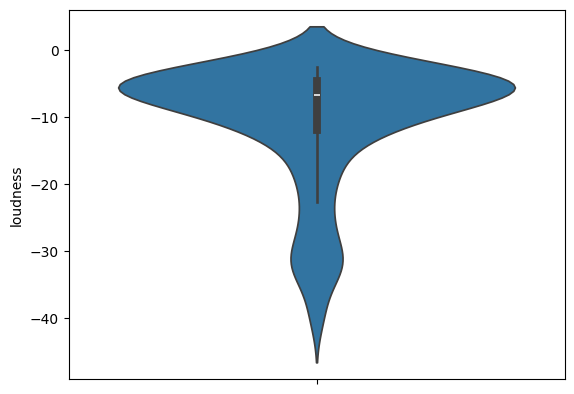

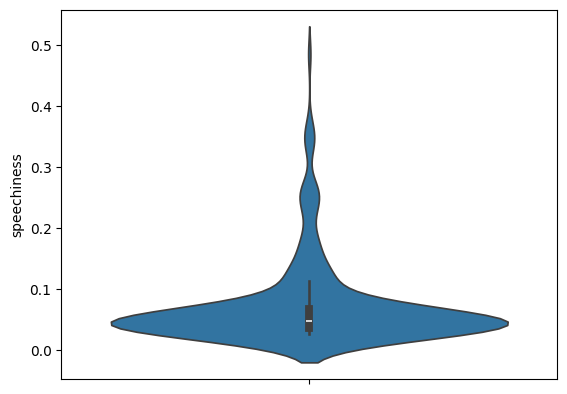

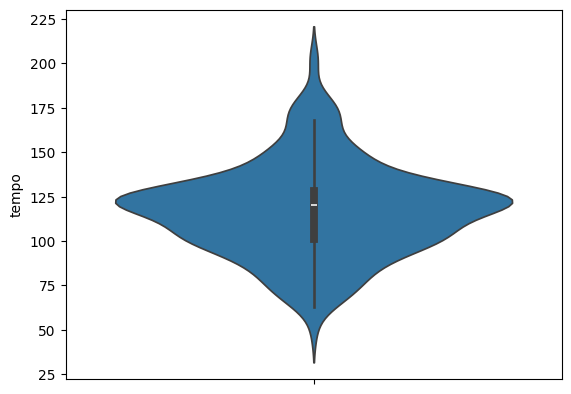

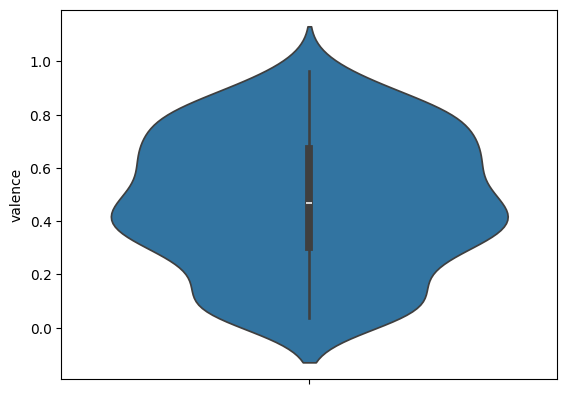

In [163]:
for var in quantitative_vars:
    sns.violinplot(df[var])
    plt.show()

Ces graphiques nous permettent de voir la répartition des données sur leur ensemble de définition dans la variable. Notamment sur les variables de type taux, nous pourrons voir si la tendance générale est plus proche du 1 ou du 0.

3. For each **qualitative variables** (that you should have stored in the variable `qualititative_vars`), provide the different values that can be taken by the variable and count the number of individuals per category.

In [164]:
for var in qualitative_vars:
    print(df[var].value_counts())

key
7     32
1     29
0     27
9     24
6     22
2     21
11    21
4     20
10    17
8     17
5     14
3      6
Name: count, dtype: int64
mode
1    160
0     90
Name: count, dtype: int64


On voit que les chansons en majeur sont plus représentées que les chansons en mineur. On ne voit rien de spécial concernant la clé de chaque chanson, certaines sont plus présentes que d'autres mais rien d'anormal.

## Multivariate analysis

### Correlation of variables

1] Using the `.corr()` method, find and analyze correlations between features. What can you deduce regarding features independence ?

In [165]:
df[quantitative_vars].corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
acousticness,1.000000,-0.538718,0.184575,-0.858784,0.802812,-0.217366,-0.831313,-0.054851,-0.214211,-0.468351
danceability,-0.538718,1.000000,-0.309187,0.480816,-0.616671,0.070571,0.564384,0.227406,-0.038844,0.487837
duration_ms,0.184575,-0.309187,1.000000,-0.202881,0.289232,-0.148772,-0.204338,-0.122419,0.037738,-0.343836
energy,-0.858784,0.480816,-0.202881,1.000000,-0.803711,0.263407,0.907639,0.089217,0.245783,0.557997
instrumentalness,0.802812,-0.616671,0.289232,-0.803711,1.000000,-0.189212,-0.871203,-0.151969,-0.226062,-0.584943
liveness,-0.217366,0.070571,-0.148772,0.263407,-0.189212,1.000000,0.217215,0.072116,0.056367,0.192959
loudness,-0.831313,0.564384,-0.204338,0.907639,-0.871203,0.217215,1.000000,0.124465,0.227803,0.527576
speechiness,-0.054851,0.227406,-0.122419,0.089217,-0.151969,0.072116,0.124465,1.000000,-0.022887,-0.049978
tempo,-0.214211,-0.038844,0.037738,0.245783,-0.226062,0.056367,0.227803,-0.022887,1.000000,0.111193
valence,-0.468351,0.487837,-0.343836,0.557997,-0.584943,0.192959,0.527576,-0.049978,0.111193,1.000000


2] Plot the correlogram and perform a quick analysis of relationship between variables using `sns.pairplot`. Understand graph per graph what is represented and deduce from it the relationship between features and what feature seems to be important for prediction.

<Axes: >

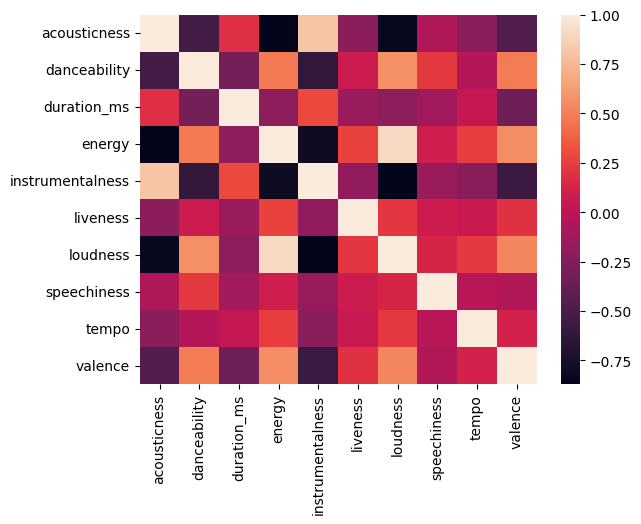

In [166]:
sns.heatmap(
    df[quantitative_vars].corr()
)

On voit que les variables loudness et energy sont corrélées négativement ainsi que instrumentalness avec acousticness positivement. En y réfléchissant et en prenant le contexte de l'étude, on peut s'apercevoir que ces variables fournissent des informations assez similaires. Nous allons donc faire un choix arbitraire pour omettre certaines de ces variables. (|r| > 0.8 pour ces variables)
On voit aussi que ces mêmes variables sont corrélées ensemble négativement (energy ainsi que loudness avec acousticness et instrumentalness). Nous allons en conserver qu'une sur les 4 (nous allons choisir instrumentalness)

In [167]:
quantitative_vars = [var for var in quantitative_vars if var not in ["acousticness", "loudness", "energy"]]
df = df.drop(["acousticness","loudness","energy"], axis=1)

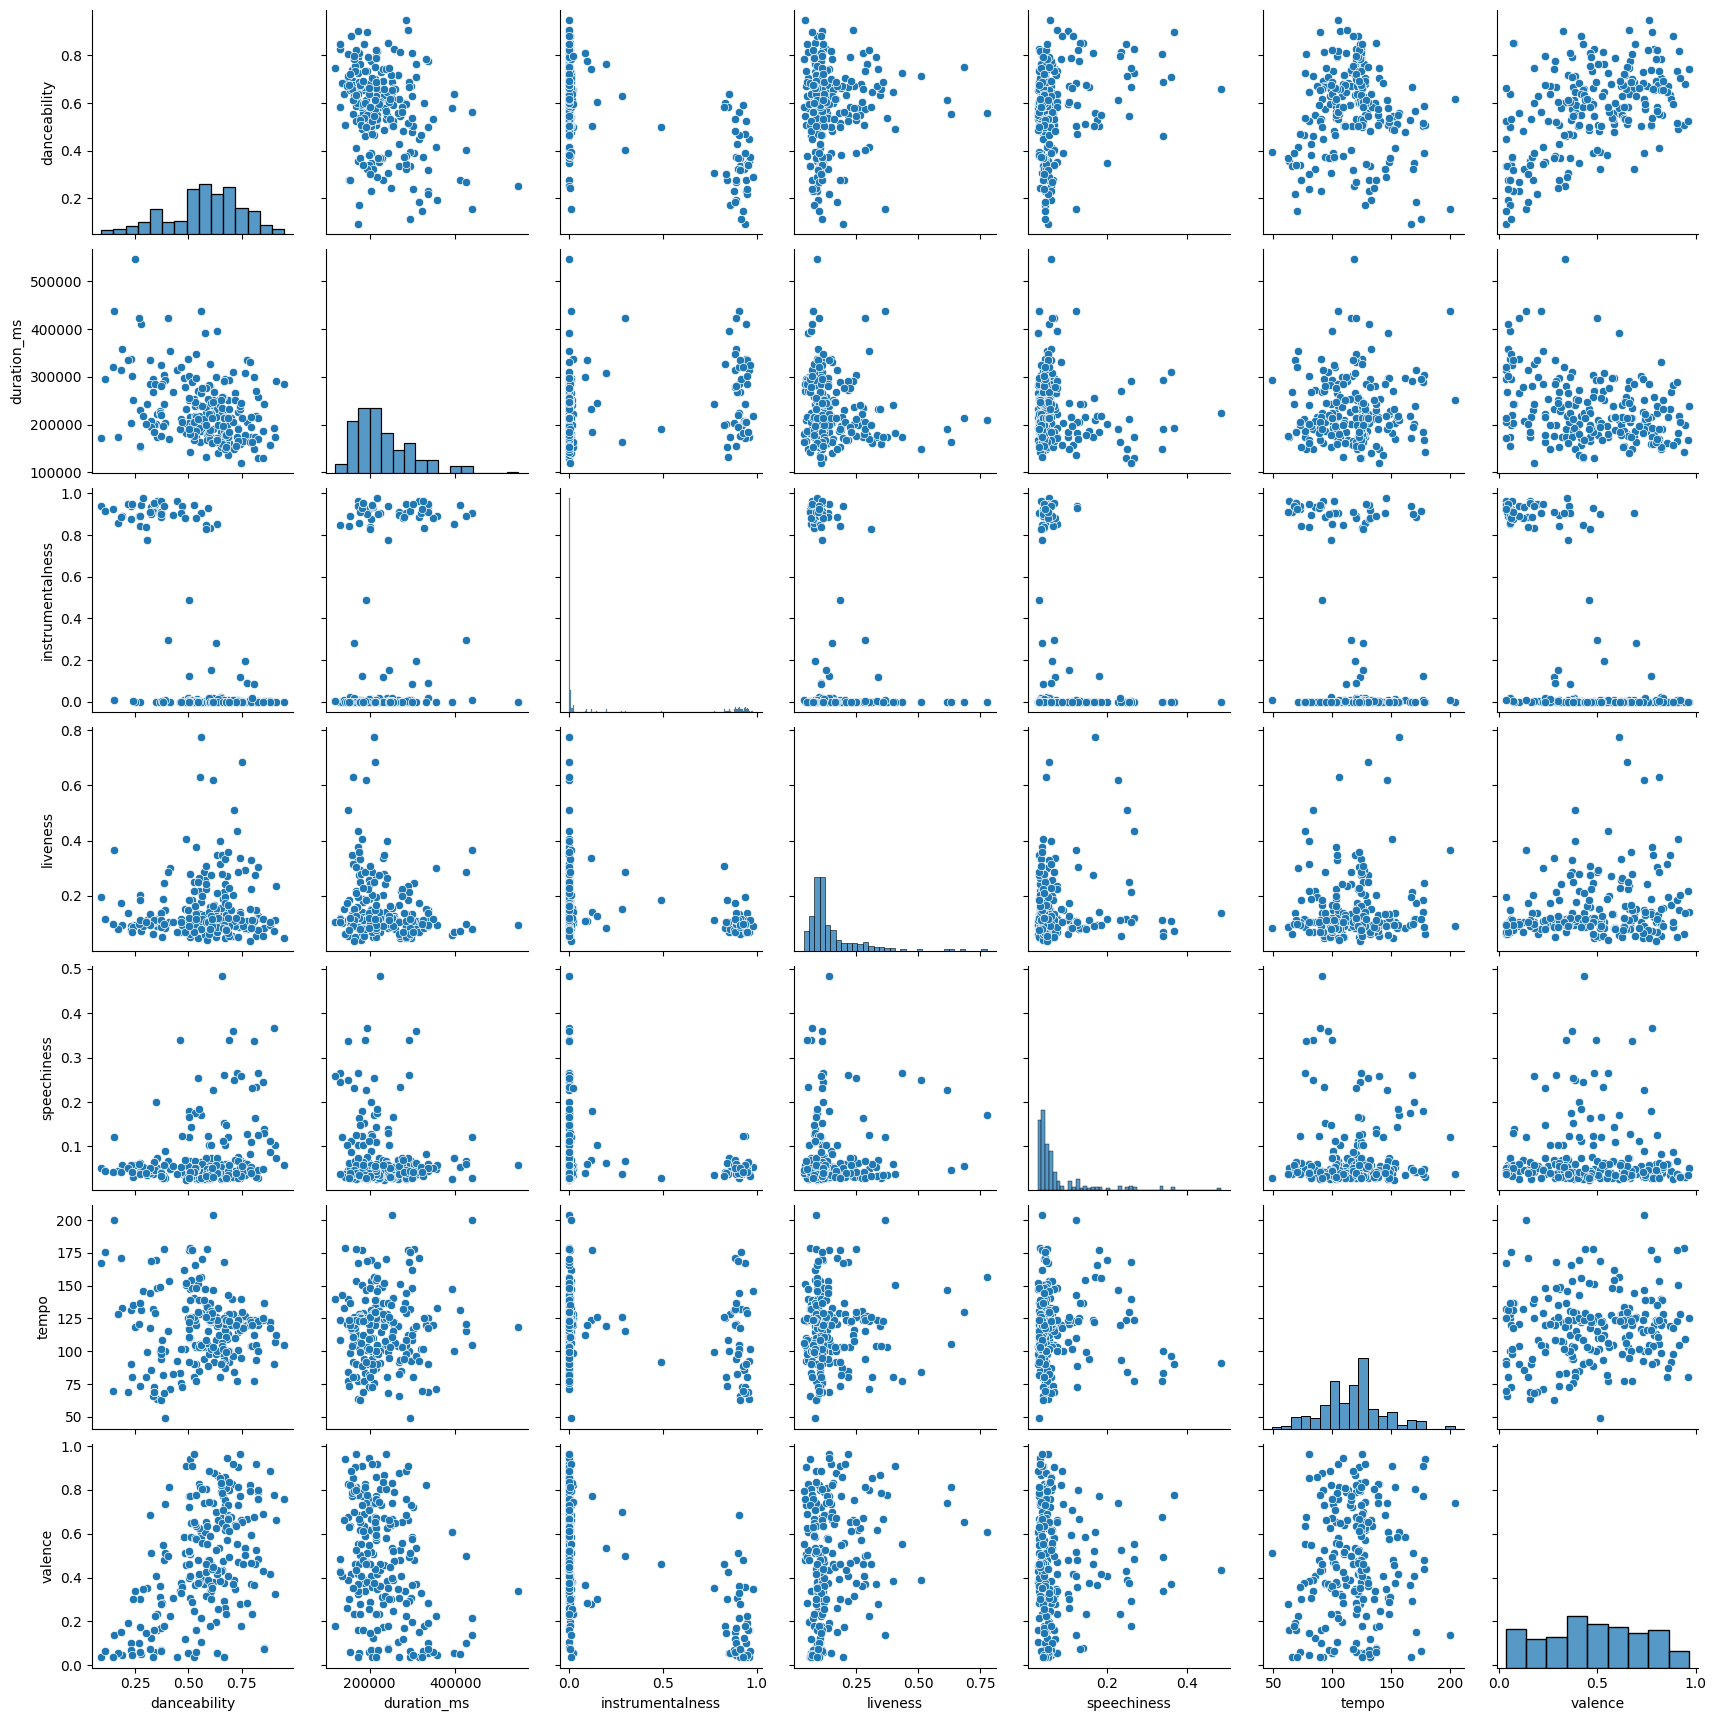

In [168]:
sns.pairplot(df[quantitative_vars[:10]])

On ne voit plus de corrélation évidente entre deux variables sur ces graphes désormais.

**3] Bonus question**: use the `sns.pairplot` function to check the correlation between qualitative variables as well.

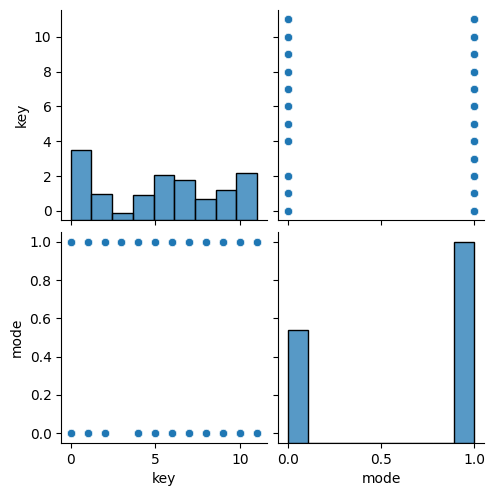

In [169]:
sns.pairplot(df[qualitative_vars[:2]])

Ces graphiques ne sont pas pertinents et ne nous permettent pas de tirer de l'information de nos données au vu des variables dont nous disposons.

### Impact of variables/features on target

The goal of our study is to **predict the target genre**, so we need to analyze the relationship between this target and the features.

1] Find the statistical repartition of **quantitative variables** (that you should have stored in the variable `quantitative_vars`) for every songs and plot it using `sns.boxplot()`. 

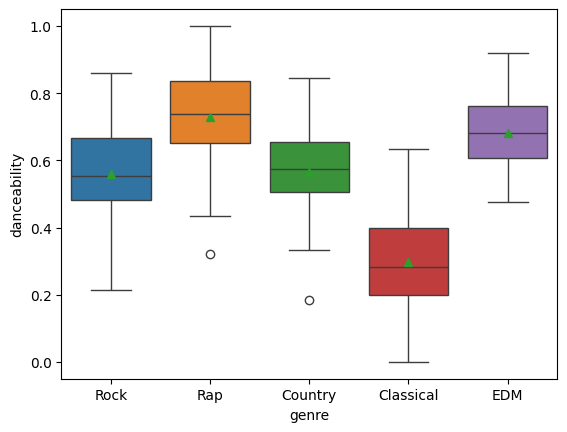

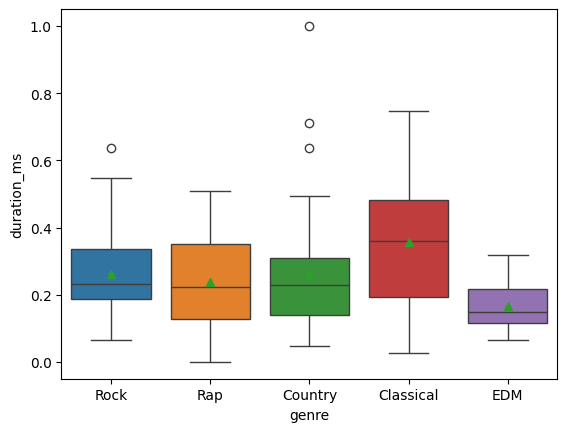

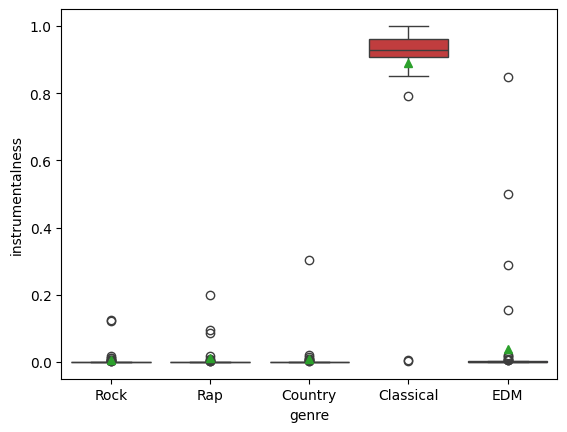

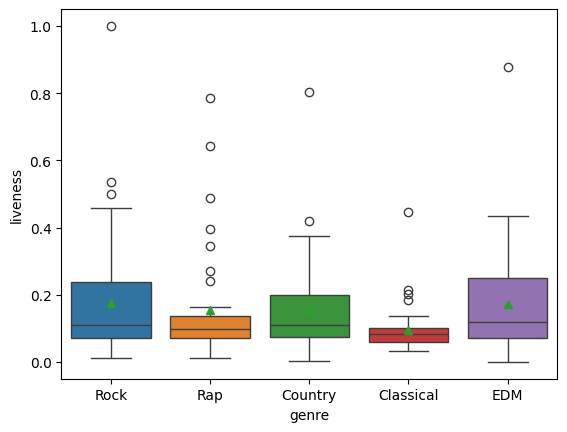

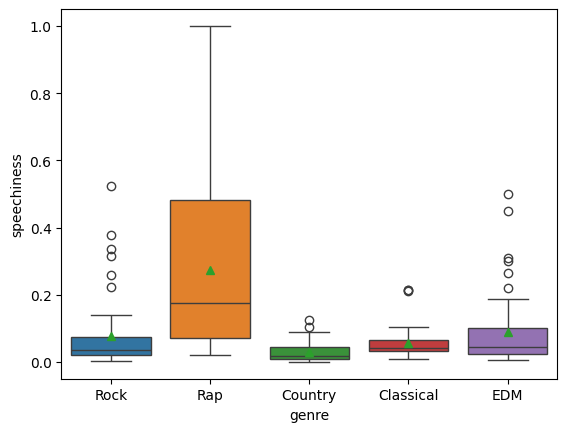

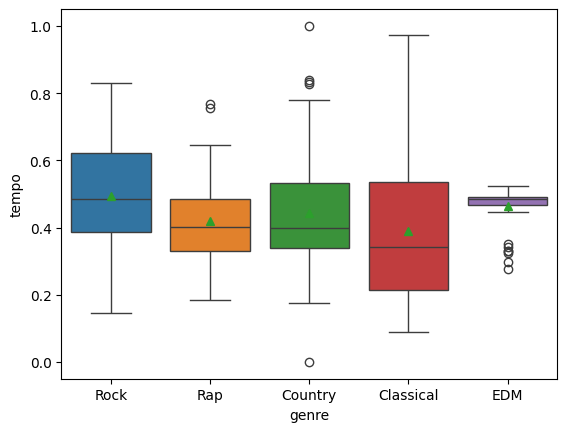

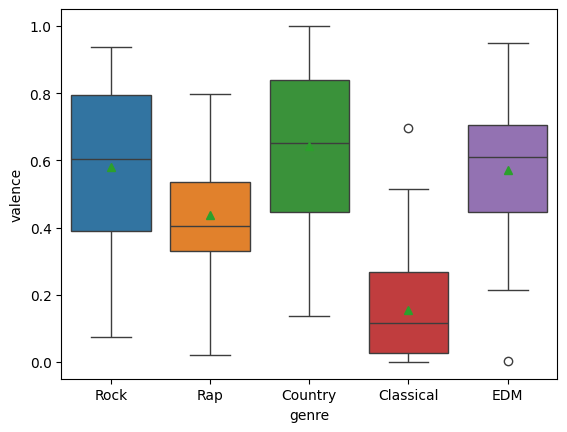

In [180]:
from scipy import stats

impact_vers = []

for var in quantitative_vars:
    sns.boxplot(y=df[var], x=target, hue=target, showmeans=True)
    plt.show()

On peut voir avec la distribution de la target que la modalité "Classical" se démarque assez régulièrement des autre sur plusieurs variables. On peut alors déjà penser que cette modalité sera plus évidente à prédire que les autres. On ne remarque pas de feature qui n'apporte aucune variation dans les distributions des modalités de la target (à la limite, la variable durée n'apporte pas beaucoup de changement d'un genre à l'autre). On va donc conserver pour le moment toutes ces variables.

2] Find the statistical repartition of genre for each **categorical variable** (that you should have stored in the variable `qualitative_vars`) and plot it using the `sns.barplot()` function.

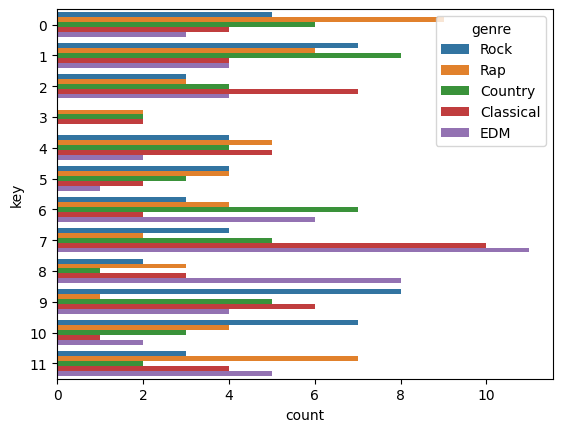

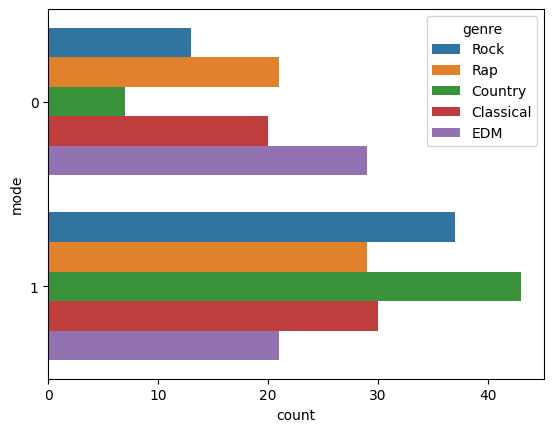

In [171]:
for var in qualitative_vars:
    sns.countplot(y=df[var], hue=target)
    plt.show()

Il est difficile d'affirmer quoique ce soit sur la première variable car elle présente beaucoup de modalités mais on voit que certains genre sont plus représentés que d'autres selon la clé. La deuxième variable en binaire est plus simple à observer, on peut voir les tendances : en général les chansons de country et de rock sont en majeur tandis que les chansons d'électro sont plutôt en mineur (très légèrement).

## Dealing with missing values

1] Have you noticed anything in particular with missing values ?

There are some missing values.

2] Find rows with missing values using the `df.isna()`` method and perform a statistical analysis on the number of missing values.

In [146]:
df.isna().sum()

artist              0
song                0
ids                 0
genre               0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
speechiness         0
tempo               0
mode                0
valence             0
dtype: int64

On voit qu'il n'y a pas de valeur manquante dans le jeu de données. On a aussi pu voir précédemment qu'il n'y a aucun individu possédant la clé "-1" synonyme de non-valeur (modalité non présente dans le jeu de données). Il y a seulement un "problème" dans ce jeu de données. Certaines musiques sont présentes en double. Il s'agit en général d'une même chanson dans deux fichiers distincts (par exemple une même musique présente dans deux albums différents), les laisser risquerait de biaiser nos résultats, en donnant plus de poids à ces musiques là. On va donc les supprimer pour qu'il n'en reste qu'une à chaque fois. Il y a certaines musiques qui sont présentes en double car elles se situent entre deux genres musicaux. Nous garderons les deux dans ce cas précis pour ne pas à avoir à trancher entre deux styles pour une même musique.

In [172]:
df = df.drop_duplicates(subset=["song","artist","genre"])

In [174]:
df.shape

(234, 13)

16 musiques en double ont été retirées du jeu de données.

In [176]:
df = df.drop(["song","artist","ids"], axis=1)

In [177]:
#On va maintenant faire en sorte que toutes les features soient normalisées entre elles. 
#On va utiliser le min-max scaling car la plupart des variables sont en taux et possèdent donc le même min et le même max
#(exception pour tempo et duration_ms)

In [178]:
from sklearn.preprocessing import MinMaxScaler

# Création d'une instance de MinMaxScaler
scaler = MinMaxScaler()

# Adapter et transformer les données notamment pour la variable tempo
df[quantitative_vars] = scaler.fit_transform(df[quantitative_vars])
df.head()

,genre,danceability,duration_ms,instrumentalness,key,liveness,speechiness,tempo,mode,valence
0,Rock,0.626561,0.418905,0.003211,10,0.031140,0.064748,0.384348,0,0.173305
1,Rock,0.303303,0.241046,0.000000,1,0.084078,0.107696,0.639850,1,0.215285
2,Rock,0.506360,0.312728,0.000080,0,0.077308,0.068672,0.589810,1,0.228202
3,Rock,0.452678,0.416564,0.006166,1,0.061197,0.023763,0.729532,1,0.589882
4,Rock,0.691913,0.111424,0.000000,8,0.122665,0.074559,0.413965,1,0.822390


On a donc un dataset nettoyé et prêt à être classifié. Nous allons en faire l'export pour l'importer directement par la suite.

In [179]:
df.to_csv("C:/Users/trist/Documents/Cours/L3_MIASHS/Compléments_maths/S2/Projet/spotifyMusicGenresClean.csv", index=False)